In [37]:
import orbitize
from orbitize import read_input
from orbitize.system import seppa2radec
from orbitize.kepler import calc_orbit

from prior import Priors

from lampe.inference import NPE, NPELoss
from lampe.nn import MLP
from lampe.utils import GDStep
from lampe.plots import nice_rc, corner, mark_point
from lampe.data import JointLoader, H5Dataset

import zuko

import astropy 

import wandb
from itertools import islice
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch import Tensor
import torch.optim as optim
import torch.optim.lr_scheduler as sched
from astropy.time import Time

from torch.distributions import Uniform, Normal

In [121]:
num_obs = 34
observation_epochs = np.linspace(51544., 66000., num_obs)

In [122]:
sma, ecc, inc, aop, pan, tau, plx, mtot

(12.938846,
 0.847692,
 116.07433,
 59.745304,
 238.6652,
 0.3123219,
 56.51072,
 1.2421877)

/home/matteo/anaconda3/envs/tfe/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 11 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/matteo/anaconda3/envs/tfe/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 11 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


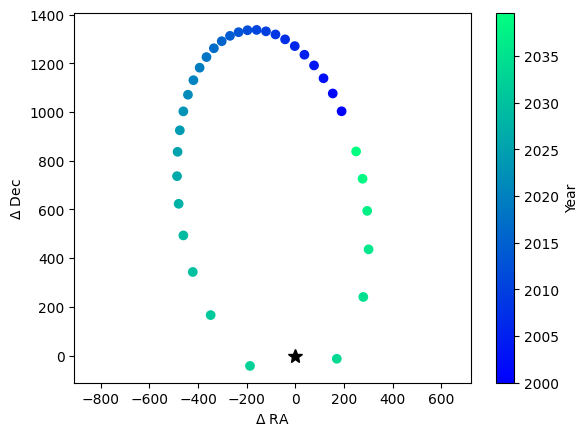

In [123]:
#sma, ecc, inc, aop, pan, tau, plx, mtot = 24.536175, 0.5, 0.7853981633974483, 120.0, 210.0, 0.8, 56.92713, 1.2318642
#sma, ecc, inc, aop, pan, tau, plx, mtot = Priors().sample((1,))[0].numpy()

ra, dec, _ = calc_orbit(observation_epochs, sma, ecc, inc, aop, pan, tau, plx, mtot, use_c=False)

plt.figure()
plt.scatter(ra, dec, c=Time(observation_epochs, format='mjd').decimalyear, cmap='winter')

plt.xlabel('$\\Delta$ RA'); plt.ylabel('$\\Delta$ Dec')
plt.axis('equal')
plt.plot(0,0,marker="*",color='black',markersize=10)
plt.colorbar(label='Year')
plt.show()